# Q.1 


# K-Means Algorithm on the Old Faithful Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Assign the URL of the data file to a variable
url = 'https://gist.githubusercontent.com/curran/4b59d1046d9e66f2787780ad51a1cd87/raw/9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv'
# the dataset is tab separated
# Read the data from the URL into a pandas DataFrame, using tab as the delimiter
df = pd.read_csv(url, sep='\t')
# Print the DataFrame to the console
df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [ ]:
def z_score(data):
    # Calculate the mean of the values in the input DataFrame
  mean = sum(data.values)/ len(data.values)
  # Calculate the squared differences from the mean for each value in the DataFrame
  stdDevitaion = (data.values - mean) ** 2
    # Calculate the mean of the squared differences
  meanStdDeviation = sum(stdDevitaion) / len(data.values)
   # Normalize the input DataFrame by subtracting the mean and dividing by the standard deviation
  dataNormalised = (data - data.mean())/data.std()
    # Return the normalized DataFrame
  return dataNormalised

stdDF = z_score(df)
stdDF.describe()

# Convert the 'stdDF' DataFrame to a NumPy array and store it in a variable 'data'
data = stdDF.to_numpy()

Text(0, 0.5, 'Waiting')

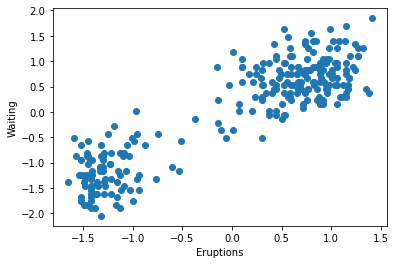

In [ ]:
X1, X2 = data[:, 0], data[:, 1]
plt.scatter(X1, X2)
plt.xlabel("Eruptions")
plt.ylabel("Waiting")

In [ ]:
clusters = 2
center_colours = ['b', 'r']
point_colours = ["lightblue", "pink"]

Function for finding the Distance between 2 points (L2 Norm), which are passed to it as numpy arrays.
$$= \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$

In [ ]:
def euc_distance(p1, p2):
 return np.sqrt(np.sum(np.square(p1 - p2)))

Cost for K-Means.
$$Cost = \sum_{i=1}^{N} \sum_{j=1}^{K} Z_{ij}||x_i - \mu_k||$$

In [ ]:
# Define a function called 'cost_function' that takes in three inputs:
# a data array, a cluster centroid array, and a matrix of cluster assignments
def cost_function(data, MU, Z):
  
  # Compute the Euclidean distance between each data point and its assigned cluster centroid
  distances = [euc_distance(data[i], MU[np.argmax(Z[i])]) for i in range(data.shape[0])]
  
  # Compute the cost function by summing the squared distances and normalizing by the number of data points
  cost = (1 / data.shape[0]) * np.sum([np.square(distances[i]) for i in range(data.shape[0])])
  
  # Return the cost function value
  return cost

In [ ]:
def plot_perpendicular_line(point1, point2):

  # Calculate the midpoint of the two points
  mid = (point1 + point2) / 2
  # Calculate the slope of the line perpendicular to the line passing through the two points
  slope = -1 / ((point2[1] - point1[1]) / (point2[0] - point1[0]))
  # Calculate the y-intercept of the perpendicular line
  intercept = mid[1] - slope * (mid[0])
   # Generate x-coordinates for the line
  x = np.linspace(-1.5, 1.5, 100)
  # Calculate y-coordinates for the line
  y = slope * x + intercept
  # Plot the line with the specified x and y coordinates, and a blue color
  plt.plot(x, y, c="blue")

In [ ]:
def plot_centers(data, MU, Z):
  
  # If there are no data points assigned to any cluster, plot the data points as green dots
  if np.sum(Z) == 0:
    X1, X2 = data[:,0], data[:,1]
    plt.scatter(X1, X2, c="lime")
    # Plot the cluster centroids as colored crosses
    for i in range(clusters):
      plt.scatter(MU[i][0], MU[i][1], c=center_colours[i], marker='x', s=300)
  
  # Otherwise, plot the data points colored by cluster assignment
  else:
    # Separate the data points into clusters based on the cluster assignments
    points = [np.array([data[i] for i in range(data.shape[0]) if Z[i, j] == 1]) for j in range(clusters)]
    # Plot the data points for each cluster with a different color
    for i in range(clusters):
      plt.scatter(points[i][:, 0], points[i][:, 1], c=point_colours[i])
      # Plot the cluster centroids as colored crosses
      plt.scatter(MU[i][0], MU[i][1], c=center_colours[i], marker='x', s=300)
  
  # Show the plot
  plt.show()


In [ ]:

def plot_clusters(data, MU, Z):
# data is a numpy array with the input data points.
# MU is a numpy array containing the centers of each cluster.
# Z is a numpy array containing the assigned cluster for each data point.

  points = [np.array([data[i] for i in range(data.shape[0]) if Z[i, j] == 1]) for j in range(clusters)]
  for i in range(clusters):
    plt.scatter(points[i][:, 0], points[i][:, 1], c=point_colours[i])
    plt.scatter(MU[i][0], MU[i][1], c=center_colours[i], marker='x', s=300)
  plot_perpendicular_line(MU[0], MU[1])
  plt.show()

E Step:
$$\begin{equation}
  Z_{ik} = \begin{cases}
    1, & \text{if $k = argmin_j||x_i - \mu_j||$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}$$
M Step:
$$\mu_k = \frac{\sum_{i=1}^{n} Z_{ik}x_i}{\sum_{i=1}^{n} Z_{ik}}$$

In [ ]:
def E_Step(n, data, MU, clusters, Z):
    """
        Perform the expectation step of the K-means algorithm.
          
          Args:
          - n (int): number of data points
          - data (ndarray): n x d array of data points
          - MU (ndarray): k x d array of cluster centers
          - clusters (int): number of clusters
          - Z (ndarray): n x k array of binary indicator variables for each data point
          
          Returns:
          - Z (ndarray): updated n x k array of binary indicator variables
    """
    for p in range(n):
        point = data[p]
        distance_from_centers = []
        for i in range(clusters):
            distance_from_centers.append(euc_distance(point, MU[i]))
        chosen_cluster = np.argmin(distance_from_centers)
        Z[p] = np.zeros(clusters)
        Z[p, chosen_cluster] = 1
    return Z

In [ ]:
def M_Step(n, MU, Z, data, clusters):
  """
        This function updates the centroids based on the assigned clusters.
        n: number of data points
        MU: current centroids
        Z: assigned clusters
        data: data points
        clusters: number of clusters
  """

  # create an empty array to store the new centroids
  MUk = np.zeros((clusters, data.shape[1]))

  # loop over the clusters
  for j in range(clusters):
    numerator = np.zeros(data.shape[1])
    denominator = np.sum(Z[:, j])
    for i in range(n):
        numerator += Z[i, j] * data[i]
    MUk[j] = numerator / denominator
  return MUk

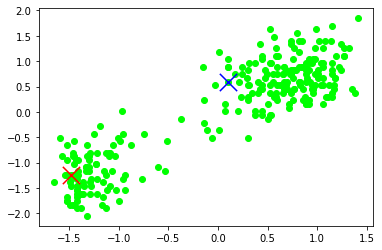

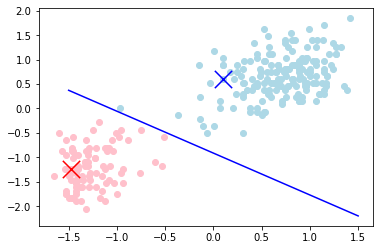

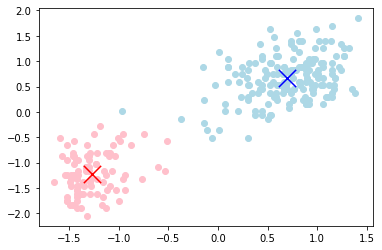

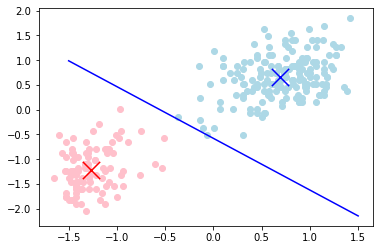

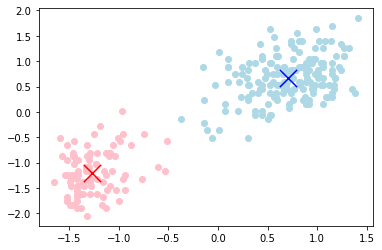

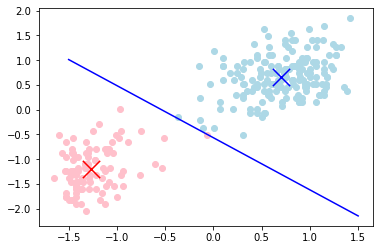

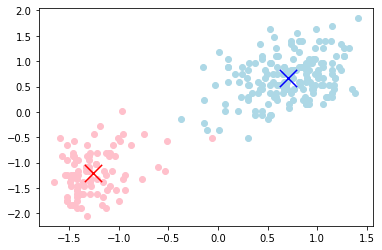

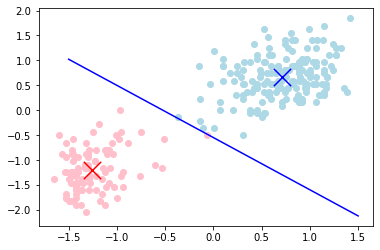

K-Means Algorithm has converged!


In [ ]:
def K_Means(data, clusters):
  n = data.shape[0]
  max_iters = 100
  MU = np.array([data[i] for i in range(clusters)])
 
  MU_prev = np.array([np.zeros(2, ) for i in range(clusters)])
  Z = np.zeros((n, clusters))
  iters = 0
  cost = []

  while iters < max_iters:
    # Plot the centers and data points with current cluster assignments
    plot_centers(data, MU, Z)
    # Perform the E-Step to update cluster assignments
    Z = E_Step(n, data, MU, clusters, Z)
    # Compute and store the cost of the current cluster assignments
    cost.append(cost_function(data, MU, Z))
    # Plot the data points with current cluster assignments
    plot_clusters(data, MU, Z)
    # Update MU_prev to keep track of the previous centers
    MU_prev = MU
    # Perform the M-Step to update the centers
    MU = M_Step(n, MU, Z, data, clusters)
    # Compute and store the cost of the updated centers and cluster assignments
    cost.append(cost_function(data, MU, Z))
    iters += 1
    # Check if the centers have converged (i.e., no change from previous iteration)
    if np.array_equal(MU, MU_prev):
      print("K-Means Algorithm has converged!")
      break
  return MU, Z, cost

# Run the K-Means Algorithm with the given data and number of clusters
centers, labels, cost_array = K_Means(data, clusters)


### Plot for total Cost for each iteration
Blue dots represent E-step and Red denote M-step

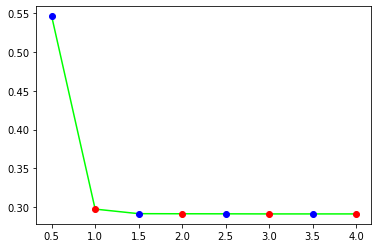

In [ ]:
x = [0.5 * i for i in range(1, len(cost_array)+1)]
y = cost_array
x1 = [x[i] for i in range(len(x)) if i % 2 == 0]
x2 = [x[i] for i in range(len(x)) if i % 2 == 1]
y1 = [y[i] for i in range(len(y)) if i % 2 == 0]
y2 = [y[i] for i in range(len(y)) if i % 2 == 1]
plt.plot(x, y, 'lime')
plt.plot(x1, y1, 'bo', x2, y2, 'ro')